In [1]:
print("""
FullName : Diallo Mamadou Korka
Studend’s Number: 022028845F
      
Modelling and Analysis of Complex Networks
Assignment : 5 
Number of the dataset : 3
""")


FullName : Diallo Mamadou Korka
Studend’s Number: 022028845F
      
Modelling and Analysis of Complex Networks
Assignment : 5 
Number of the dataset : 3



In [2]:
# import the modules
import urllib.request
import networkx as nx
import numpy as np
import random
import matplotlib.pyplot as plt
from networkx.algorithms import community

from community import community_louvain
from networkx.algorithms.community import girvan_newman, label_propagation_communities

In [3]:
#Load the dataset
# Load the Facebook-Ego network undirect graph
facebook_url = "https://raw.githubusercontent.com/wang422003/Complex-Networks_exercise/main/Datasets/Group3/Facebook-Ego/348.edges"
urllib.request.urlretrieve(facebook_url, "facebook.edges")
facebook_network = nx.read_edgelist("facebook.edges", nodetype=int)

# Load the Twitter-Ego network direct graph
twitter_url = "https://raw.githubusercontent.com/wang422003/Complex-Networks_exercise/main/Datasets/Group3/Twitter-Ego/789071.edges"
urllib.request.urlretrieve(twitter_url, "twitter.edges")
twitter_network = nx.read_edgelist("twitter.edges", nodetype=int, create_using=nx.DiGraph())

Create and visualize the subgraph for Facebook 



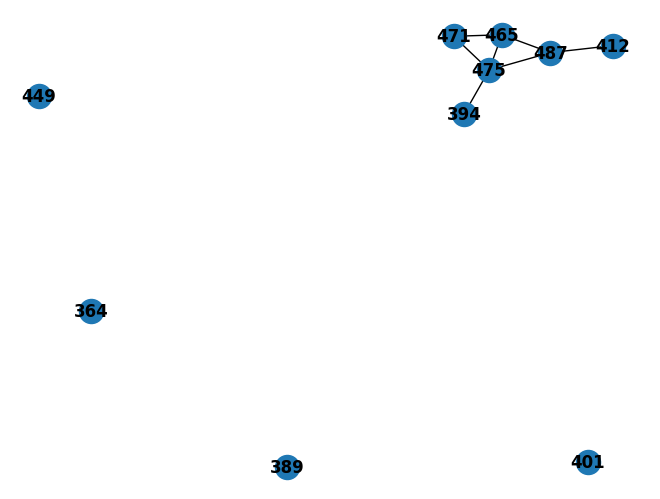

--------------------------------------------------------------------------------------
Create and visualize the subgraph for Twitter



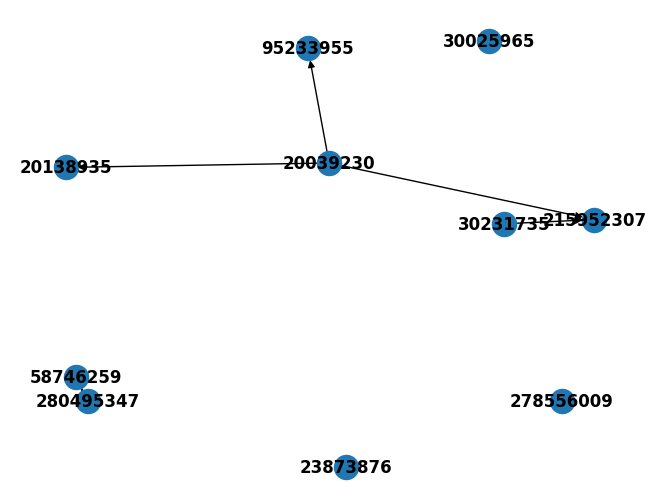

In [37]:
#(a)Please choose ten nodes from either dataset, and return a SubGraph View of the subgraphs induced on the chosen ten nodes.
def create_and_visualize_subgraph(network, num_nodes=10, visualize=True):
    # Convert set of nodes to a list
    all_nodes = list(network.nodes())

    # Choose ten random nodes
    chosen_nodes = random.sample(all_nodes, num_nodes)

    # Create a subgraph
    subgraph = network.subgraph(chosen_nodes)

    # Visualize the subgraph 
    if visualize:
        nx.draw(subgraph, with_labels=True, font_weight='bold')
        plt.show()

    return subgraph



print("Create and visualize the subgraph for Facebook \n")
subgraph_facebook = create_and_visualize_subgraph(facebook_network)


print("--------------------------------------------------------------------------------------")

print("Create and visualize the subgraph for Twitter\n")
subgraph_twitter = create_and_visualize_subgraph(twitter_network)


In [38]:
#(b) Please list three algorithms for community detection.
print("""Three algorithms that we can use for community detection are:

1. Louvain algorithm: This is a popular algorithm for community detection that optimizes modularity,
       a measure of the quality of a partition of a network into communities.

2. Girvan-Newman algorithm: This algorithm works by iteratively removing edges from the network based on their betweenness centrality,
       which is a measure of how important an edge is for connecting different parts of the network.

3. Label propagation algorithm: This algorithm works by assigning each node in the network to a community based on the communities of its neighbors, 
      and then iteratively updating the community assignments until convergence.
""")

Three algorithms that we can use for community detection are:

1. Louvain algorithm: This is a popular algorithm for community detection that optimizes modularity,
       a measure of the quality of a partition of a network into communities.

2. Girvan-Newman algorithm: This algorithm works by iteratively removing edges from the network based on their betweenness centrality,
       which is a measure of how important an edge is for connecting different parts of the network.

3. Label propagation algorithm: This algorithm works by assigning each node in the network to a community based on the communities of its neighbors, 
      and then iteratively updating the community assignments until convergence.



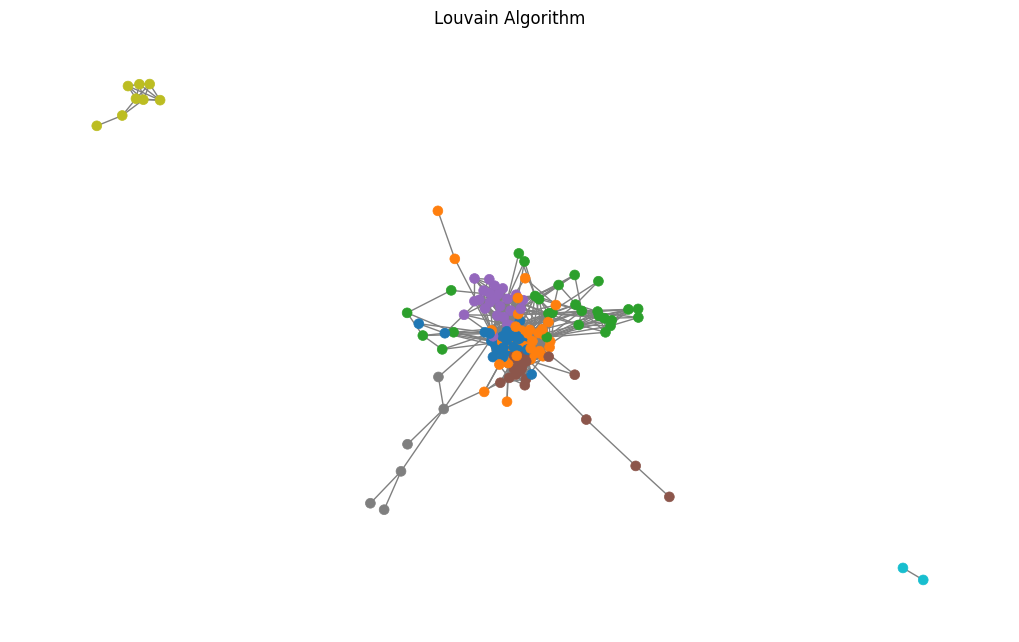

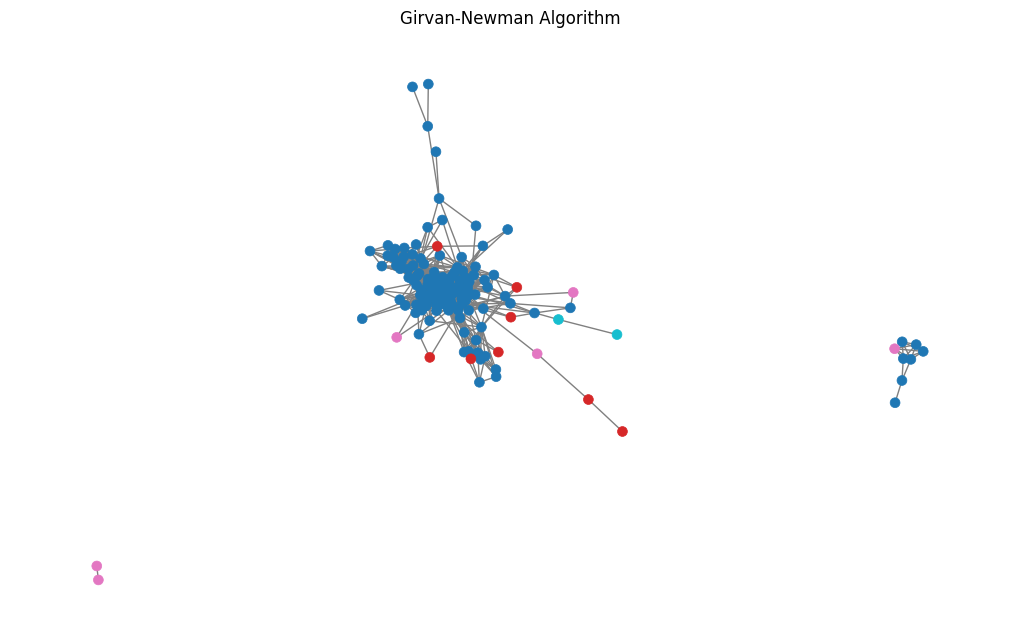

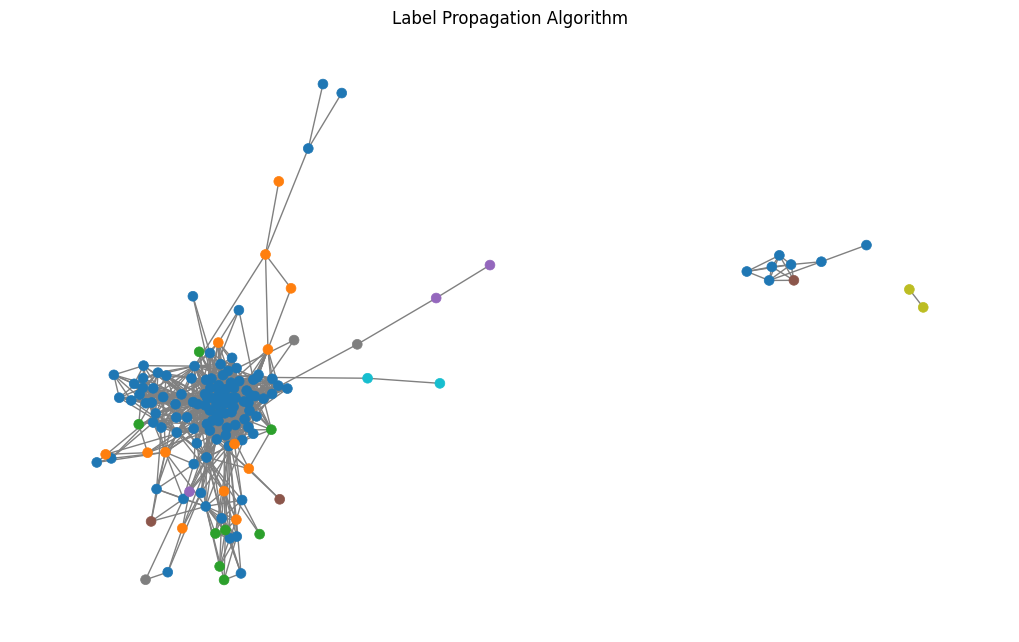

In [41]:
#(c) Please choose one of the datasets, and utilize all of the algorithms listed in (b) to detect communities in the dataset. 
#Please plot graphs to show the communities (mark nodes with different colors / draw communities unions....).

# Apply Louvain algorithm
partition_louvain = community_louvain.best_partition(facebook_network)

# Apply Girvan-Newman algorithm
communities_girvan_newman = next(girvan_newman(facebook_network))

# Apply Label Propagation algorithm
communities_label_propagation = list(label_propagation_communities(facebook_network))

# Plot Louvain communities
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(facebook_network)
node_colors_louvain = [partition_louvain[node] for node in facebook_network.nodes()]
nx.draw(
    facebook_network,
    pos,
    node_color=node_colors_louvain,
    with_labels=False,
    cmap=plt.get_cmap('tab10'),  
    node_size=50,
    linewidths=0.5,
    edge_color='gray'
)
plt.title("Louvain Algorithm")
plt.show()

# Plot Girvan-Newman communities
plt.figure(figsize=(10, 6))
node_colors_girvan_newman = [i for i, comm in enumerate(communities_girvan_newman) for _ in comm]
nx.draw(
    facebook_network,
    node_color=node_colors_girvan_newman,
    with_labels=False,
    cmap=plt.get_cmap('tab10'),  
    node_size=50,
    linewidths=0.5,
    edge_color='gray'
)
plt.title("Girvan-Newman Algorithm")
plt.show()

# Plot Label Propagation communities
plt.figure(figsize=(10, 6))
node_colors_label_propagation = [i for i, comm in enumerate(communities_label_propagation) for _ in comm]
nx.draw(
    facebook_network,
    node_color=node_colors_label_propagation,
    with_labels=False,
    cmap=plt.get_cmap('tab10'),  
    node_size=50,
    linewidths=0.5,
    edge_color='gray'
)
plt.title("Label Propagation Algorithm")
plt.show()


In [44]:
#(d) What are the differences between the community detection results shown in (c)? What are the possible reasons?

## What are the differences between the community detection results shown in (c)?
print("""In the Louvain algorithm plot, we can see that the network is divided into several large communities, with some smaller 
      communities on the periphery. In contrast, the Girvan-Newman algorithm plot shows a more hierarchical structure, with several 
      levels of communities nested within each other. Finally, the Label Propagation algorithm plot shows a more fragmented structure,
       with many small communities that overlap with each other. """)
## What are the possible reasons?
print("""
The differences in community detection results across algorithms can be attributed to various factors, including the underlying 
      principles and mechanisms of each algorithm. The potential reasons for the observed differences can be:

1. Objective Function:
   - Louvain Algorithm optimizes modularity, aiming to maximize the density of edges within communities relative to the density of edges between communities.
   - Girvan-Newman Algorithm focuses on edge betweenness centrality, iteratively removing edges that connect communities.
   - Label Propagation Algorithm relies on node-labeling and the propagation of labels based on the majority label of neighbors.

2. Resolution Sensitivity
   - Louvain tends to find larger communities but may merge smaller ones in the process due to its resolution limit.
   - Girvan-Newman can identify hierarchical structures, as it works by progressively breaking connections with the highest betweenness centrality.
   - Label Propagation may result in fragmented communities, especially when the network has dense regions.

3. Handling Overlapping Communities:
   - Louvain tends to assign nodes to a single community, leading to non-overlapping communities.
   - Girvan-Newman can identify overlapping communities to some extent, particularly in the hierarchical structure.
   - Label Propagation can result in communities with nodes that belong to multiple overlapping groups.

4. Network Structure:
   - The structure and characteristics of the specific network dataset can influence algorithm performance.
   - Some algorithms may be more suitable for detecting specific types of community structures, such as cliques, hierarchies, or sparse networks.

5. Parameter Sensitivity:
   - Different algorithms may have parameters that influence their behavior, and the optimal parameter values can vary for different datasets.
   - Sensitivity to initial conditions or random processes in some algorithms may lead to variations in results.

6. Algorithm Assumptions:
   - Each algorithm makes certain assumptions about the nature of communities in the network.
   - Louvain assumes that communities are locally optimized with respect to modularity.
   - Girvan-Newman assumes that edges with high betweenness centrality are likely to connect different communities.
   - Label Propagation assumes that nodes with similar labels are likely to belong to the same community.

In Conclusion, the differences arise from the unique characteristics and goals of each algorithm, 
      as well as the specific properties of the network being analyzed. 
      
      """)

In the Louvain algorithm plot, we can see that the network is divided into several large communities, with some smaller 
      communities on the periphery. In contrast, the Girvan-Newman algorithm plot shows a more hierarchical structure, with several 
      levels of communities nested within each other. Finally, the Label Propagation algorithm plot shows a more fragmented structure,
       with many small communities that overlap with each other. 

The differences in community detection results across algorithms can be attributed to various factors, including the underlying 
      principles and mechanisms of each algorithm. The potential reasons for the observed differences can be:

1. Objective Function:
   - Louvain Algorithm optimizes modularity, aiming to maximize the density of edges within communities relative to the density of edges between communities.
   - Girvan-Newman Algorithm focuses on edge betweenness centrality, iteratively removing edges that connect communities.
 